In [ ]:
#Geers up
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
creditos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/2_DS_creditos.csv')


In [ ]:
prestamos=creditos

In [ ]:
creditos.head()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
#Datos Perdidos
total = prestamos.isnull().sum().sort_values(ascending=False)
percent = (prestamos.isnull().sum()/prestamos.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Mto_ingreso_mensual,29731,0.198207
Nro_dependiente,3924,0.026160
Nro_retraso_ultm3anios,0,0.000000
Nro_creditos_hipotecarios,0,0.000000
Nro_retraso_60dias,0,0.000000
Nro_prod_financieros_deuda,0,0.000000
Prct_deuda_vs_ingresos,0,0.000000
Nro_prestao_retrasados,0,0.000000
Edad,0,0.000000
Prct_uso_tc,0,0.000000


In [ ]:
prestamos=prestamos.drop(['Mto_ingreso_mensual'], axis=1) #para eliminar esta columna

In [ ]:
prestamos.shape

(614, 13)

In [ ]:
prestamos.groupby(['Nro_dependiente']).size() #es usado como tabla de frecuencia

Nro_dependiente
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

In [ ]:
# tratamiento de valores missing

prestamos['Nro_dependiente'] = prestamos['Nro_dependiente'].fillna(prestamos['Nro_dependiente'].dropna().mean())

In [ ]:
prestamos.shape[0]

150000

In [ ]:
###composicion de datos a predecir
prestamos['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
###porcentaje de aprobaciones
prestamos['Loan_Status'].value_counts()/prestamos.shape[0] #resultados en porcentaje

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [ ]:
prestamos.describe()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,0.319196,50.581493,0.421033,0.466287,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,0.349481,12.163690,4.192781,0.355455,5.145951,4.169304,1.129771,4.155179,1.100404
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,1.000000,65.000000,98.000000,1.000000,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
prestamos.loc[prestamos.Prct_uso_tc>=1,'Prct_uso_tc']= 1

In [ ]:
prestamos.loc[prestamos.Prct_deuda_vs_ingresos>=1,'Prct_deuda_vs_ingresos']= 1

In [ ]:
prestamos.loc[prestamos.Edad>=65,'Edad']= 65

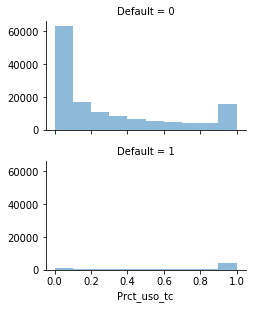

In [ ]:
# histogramas de ingresos del solicitante por
grid = sns.FacetGrid(prestamos, row='Default', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Prct_uso_tc', alpha=.5, bins=10)
grid.add_legend()

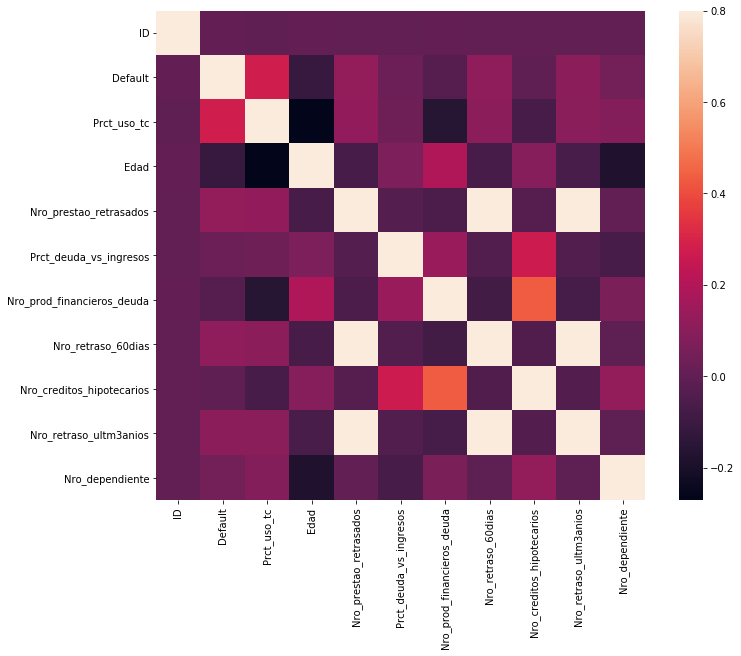

In [ ]:
#matriz de correlacion
corrmat = prestamos.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

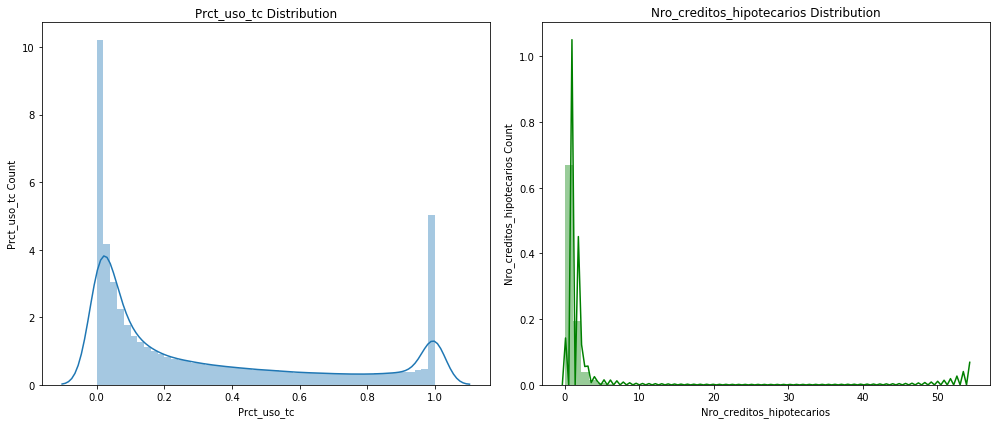

<Figure size 432x288 with 0 Axes>

In [ ]:
#prestamos['log_Prct_uso_tc'] = np.log(prestamos['Prct_uso_tc'])
#prestamos['log_Loan_Amount'] = np.log(prestamos['Loan_Amount'])

flg, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))
sns.distplot(prestamos['Prct_uso_tc'], ax = axes[0]).set_title('Prct_uso_tc Distribution')
axes[0].set_ylabel('Prct_uso_tc Count')


sns.distplot(prestamos['Nro_creditos_hipotecarios'],color = "g", ax = axes[1]).set_title('Nro_creditos_hipotecarios Distribution')
axes[1].set_ylabel('Nro_creditos_hipotecarios Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [ ]:
prestamos['log_Prct_uso_tc'] = np.log(prestamos['Prct_uso_tc'])


In [ ]:
prestamos.head()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,log_Prct_uso_tc,log_Nro_creditos_hipotecarios
0,1,1,0.766127,45,2,0.802982,13,0,6,0,2.0,-0.266408,1.791759
1,2,0,0.957151,40,0,0.121876,4,0,0,0,1.0,-0.043794,-inf
2,3,0,0.658180,38,1,0.085113,2,1,0,0,0.0,-0.418277,-inf
3,4,0,0.233810,30,0,0.036050,5,0,0,0,0.0,-1.453247,-inf
4,5,0,0.907239,49,1,0.024926,7,0,1,0,0.0,-0.097349,0.000000


OverflowError: ignored

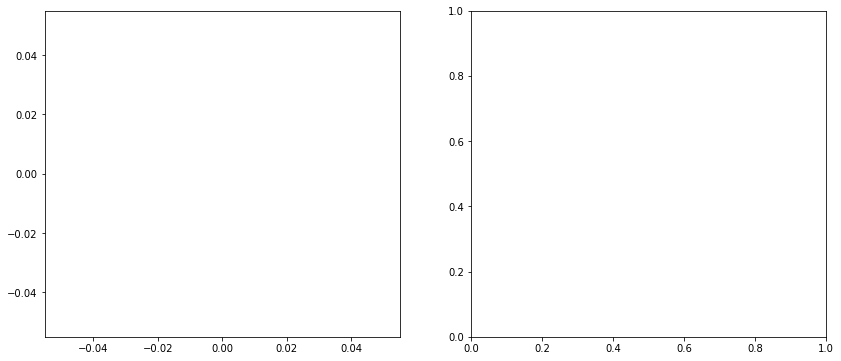

In [ ]:
flg, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))
sns.distplot(prestamos['log_Prct_uso_tc'], ax = axes[0]).set_title('log_Prct_uso_tc Distribution')
axes[0].set_ylabel('log Prct_uso_tc Count')


sns.distplot(prestamos['Prct_uso_tc'],color = "g", ax = axes[1]).set_title('Prct_uso_tc Distribution')
axes[1].set_ylabel('log Prct_uso_tc Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()



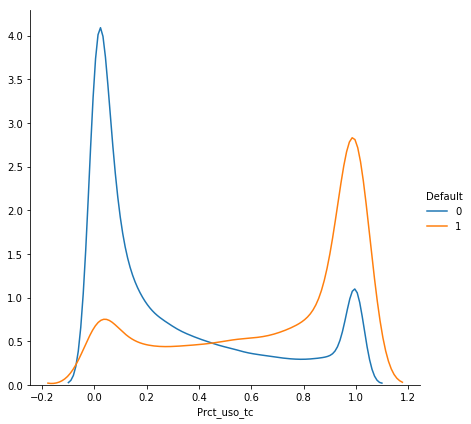

In [ ]:
## Grafico de densidad de lo ingresos por genero
sns.FacetGrid(prestamos, hue="Default", size=6) \
   .map(sns.kdeplot, "Prct_uso_tc") \
   .add_legend()

In [ ]:
prestamos.groupby(['Default']).size()

Default
0    139974
1     10026
dtype: int64

In [ ]:
10026/(139974+10026)

0.06684

In [ ]:
prestamos_final=prestamos.drop(['ID', 'log_Nro_creditos_hipotecarios', 'log_Prct_uso_tc'], axis=1)
col_names=prestamos_final.columns.tolist()
col_names #NOS QUEDAMOS SOLOS CON ESTOS

['Default',
 'Prct_uso_tc',
 'Edad',
 'Nro_prestao_retrasados',
 'Prct_deuda_vs_ingresos',
 'Nro_prod_financieros_deuda',
 'Nro_retraso_60dias',
 'Nro_creditos_hipotecarios',
 'Nro_retraso_ultm3anios',
 'Nro_dependiente']

In [ ]:
X= prestamos_final.drop(['Default'],axis=1)
y = prestamos_final['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
prestamos.loc[prestamos.Dependents=='','Prct_uso_tc']= 4


prestamos.loc[prestamos.Gender=='Male','Gender']= 0
prestamos.loc[prestamos.Gender=='Female','Gender']=1

prestamos.loc[prestamos.Married=='No','Married']= 0
prestamos.loc[prestamos.Married=='Yes','Married']=1



prestamos.loc[prestamos.Education=='Graduate','Education']= 0
prestamos.loc[prestamos.Education=='Not Graduate','Education']=1

prestamos.loc[prestamos.Self_Employed=='No','Self_Employed']= 0
prestamos.loc[prestamos.Self_Employed=='Yes','Self_Employed']=1

In [ ]:
# histogramas de ingresos del solicitante por
grid = sns.FacetGrid(prestamos, row='Gender', col='Married', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Nro_dependiente', alpha=.5, bins=10)
grid.add_legend()

KeyError: ignored

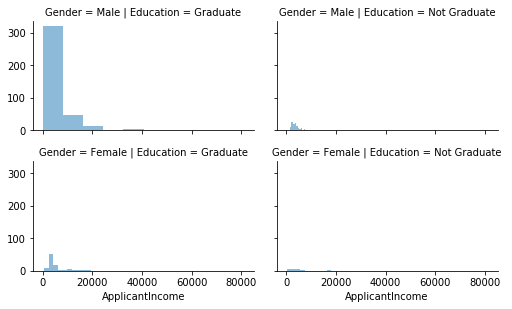

In [ ]:
grid = sns.FacetGrid(prestamos, row='Gender', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

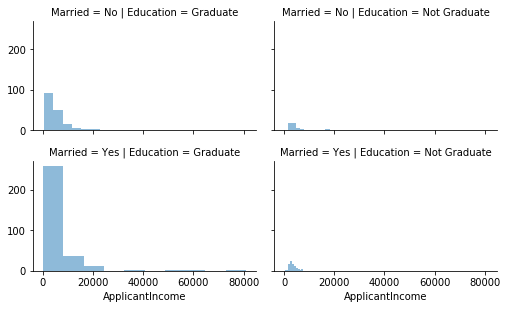

In [ ]:
grid = sns.FacetGrid(prestamos, row='Married', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(prestamos, row='Self_Employed', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

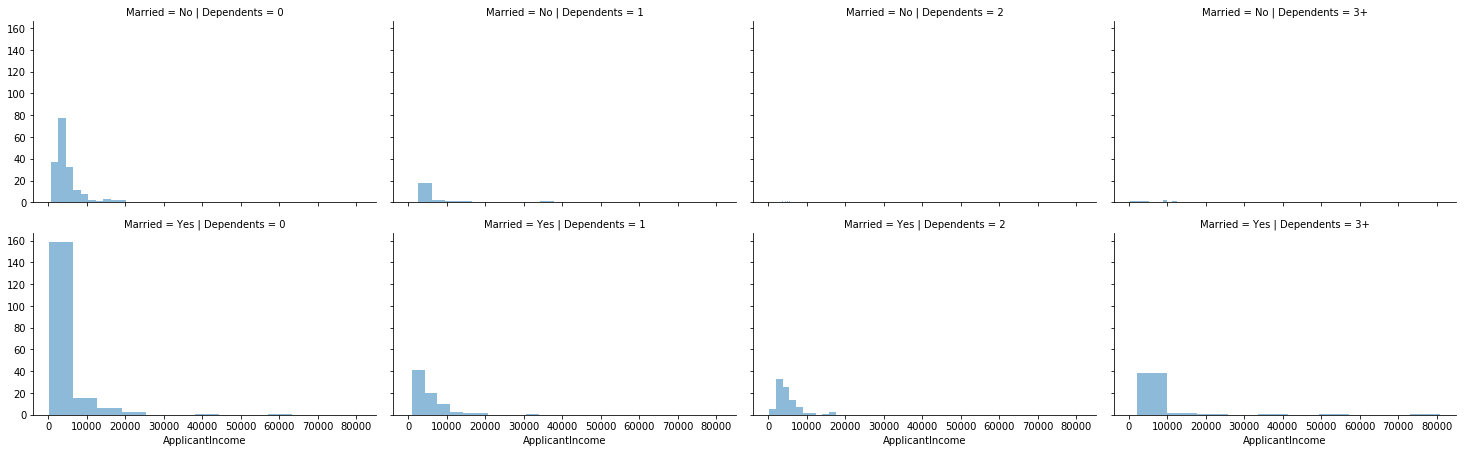

In [ ]:
grid = sns.FacetGrid(prestamos, row='Married', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

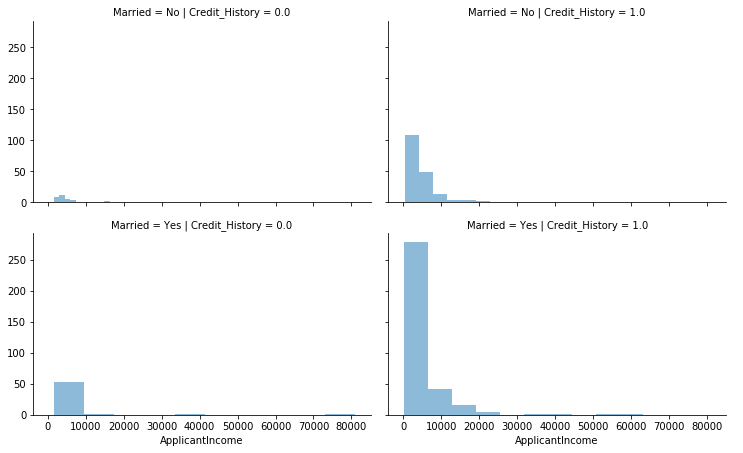

In [ ]:
grid = sns.FacetGrid(prestamos, row='Married', col='Credit_History', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

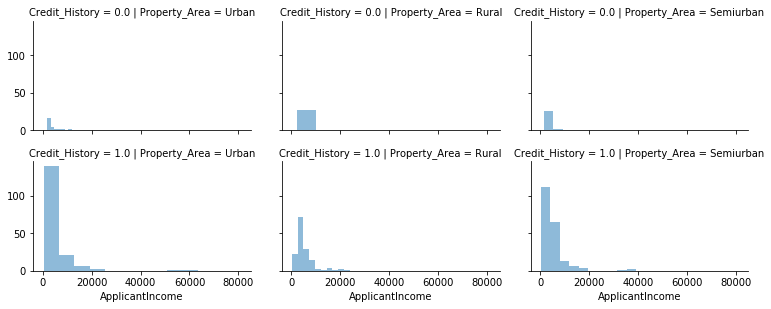

In [ ]:
grid = sns.FacetGrid(prestamos, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

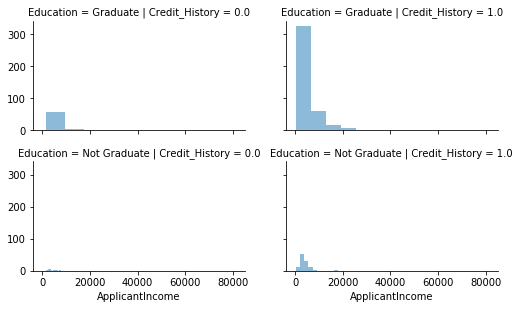

In [ ]:
grid = sns.FacetGrid(prestamos, row='Education', col='Credit_History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

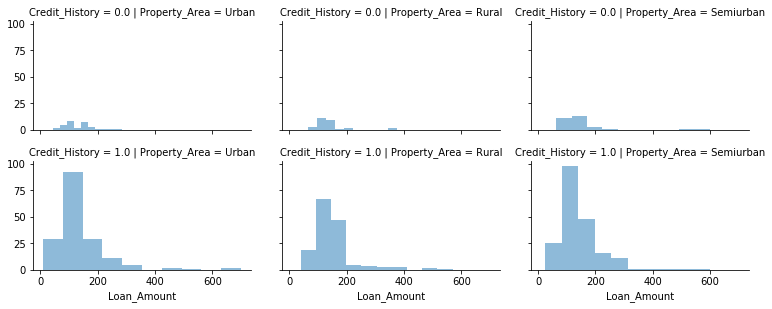

In [ ]:
grid = sns.FacetGrid(prestamos, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Loan_Amount', alpha=.5, bins=10)
grid.add_legend()

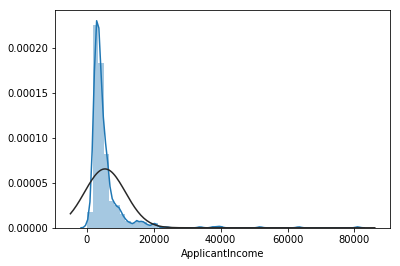

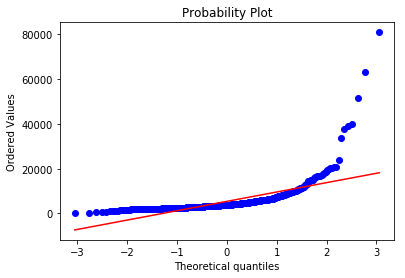

In [ ]:
#histograma con distribucion de probabilidad
sns.distplot(prestamos['ApplicantIncome'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['ApplicantIncome'], plot=plt)

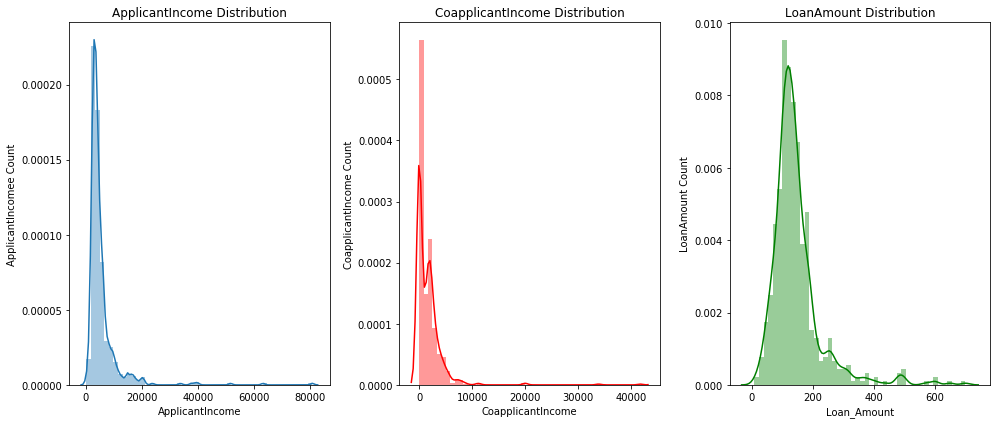

<Figure size 432x288 with 0 Axes>

In [ ]:
flg, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6))

sns.distplot(prestamos['ApplicantIncome'], ax = axes[0]).set_title('ApplicantIncome Distribution')
axes[0].set_ylabel('ApplicantIncomee Count')

sns.distplot(prestamos['CoapplicantIncome'], color = "r", ax = axes[1]).set_title('CoapplicantIncome Distribution')
axes[1].set_ylabel('CoapplicantIncome Count')

sns.distplot(prestamos['Loan_Amount'],color = "g", ax = axes[2]).set_title('LoanAmount Distribution')
axes[2].set_ylabel('LoanAmount Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()

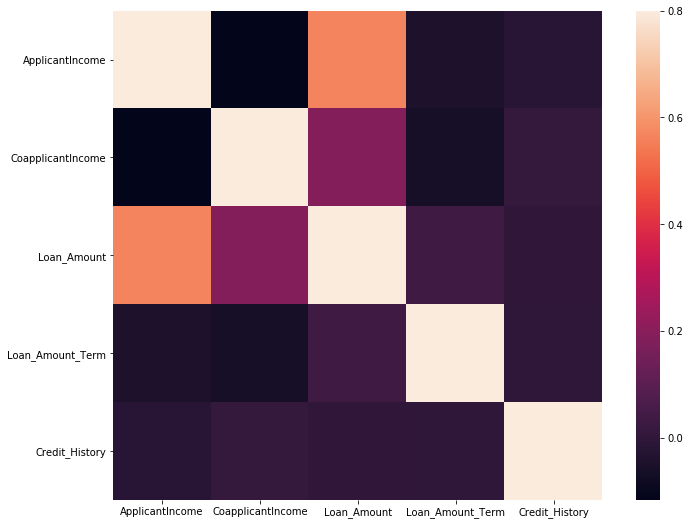

In [ ]:
#matriz de correlacion
corrmat = prestamos.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

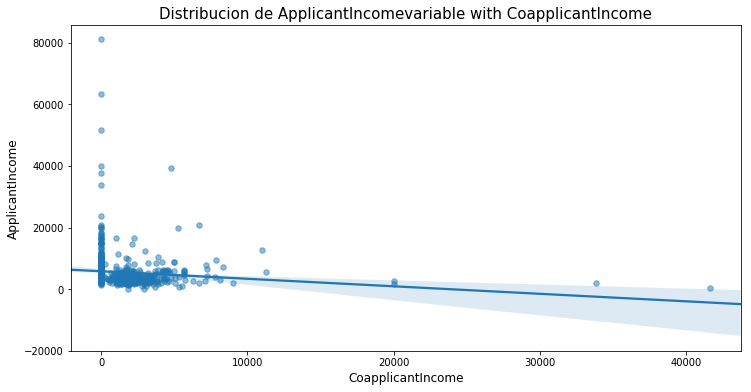

In [ ]:
x_var_name = "CoapplicantIncome"
y_var_name = "ApplicantIncome"
data_f =prestamos
plt.figure(figsize=(12,6))
sns.regplot(x=x_var_name, y=y_var_name, data=data_f, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(x_var_name, fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title("Distribucion de " + y_var_name + "variable with "+x_var_name, fontsize=15)
plt.show()

In [ ]:
sum = prestamos['ApplicantIncome'] + prestamos['CoapplicantIncome']  # a Series
# and
prestamos['total_ingreso'] = prestamos['ApplicantIncome'] + prestamos['CoapplicantIncome']  # assigned to a column

In [ ]:
prestamos.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_ingreso
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


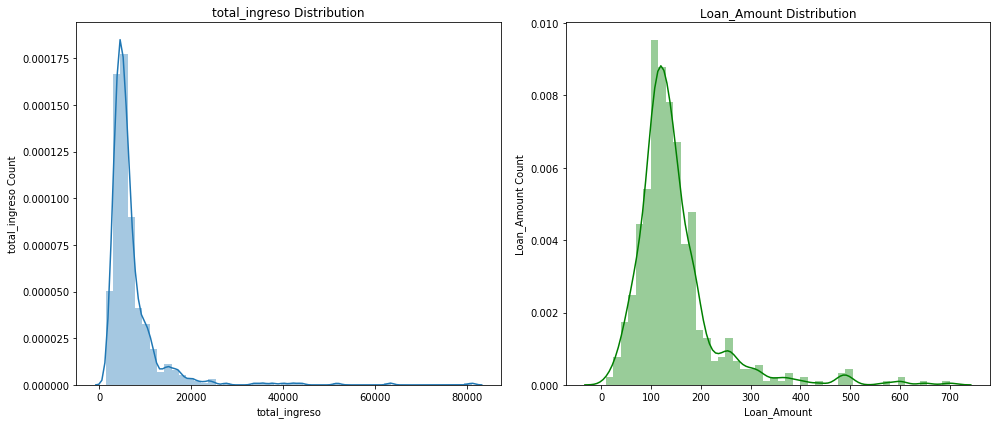

<Figure size 432x288 with 0 Axes>

In [ ]:
flg, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))
sns.distplot(prestamos['total_ingreso'], ax = axes[0]).set_title('total_ingreso Distribution')
axes[0].set_ylabel('total_ingreso Count')


sns.distplot(prestamos['Loan_Amount'],color = "g", ax = axes[1]).set_title('Loan_Amount Distribution')
axes[1].set_ylabel('Loan_Amount Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [ ]:
## Tranformación logaritmica de los datos total ingreso y Amount_Count

prestamos['log_total_ingreso'] = np.log(prestamos['total_ingreso'])
prestamos['log_Loan_Amount'] = np.log(prestamos['Loan_Amount'])


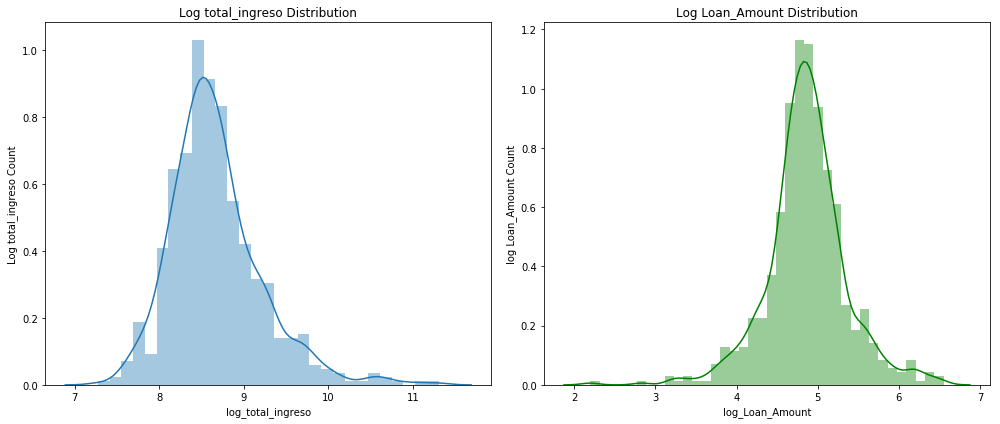

<Figure size 432x288 with 0 Axes>

In [ ]:
flg, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))
sns.distplot(prestamos['log_total_ingreso'], ax = axes[0]).set_title('Log total_ingreso Distribution')
axes[0].set_ylabel('Log total_ingreso Count')


sns.distplot(prestamos['log_Loan_Amount'],color = "g", ax = axes[1]).set_title('Log Loan_Amount Distribution')
axes[1].set_ylabel('log Loan_Amount Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()

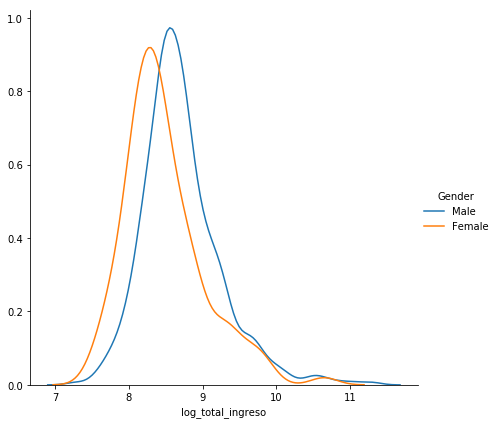

In [ ]:
## Grafico de densidad de lo ingresos por genero
sns.FacetGrid(prestamos, hue="Gender", size=6) \
   .map(sns.kdeplot, "log_total_ingreso") \
   .add_legend()

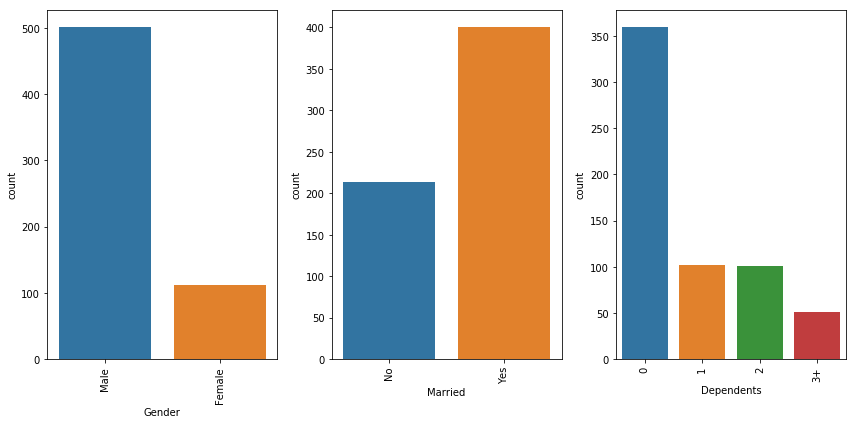

<Figure size 432x288 with 0 Axes>

In [ ]:
## Gráfico

fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(prestamos["Gender"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(prestamos["Married"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(prestamos["Dependents"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()



In [ ]:
print(prestamos.describe())

       ApplicantIncome  CoapplicantIncome  ...  log_total_ingreso  log_Loan_Amount
count       614.000000         614.000000  ...         614.000000       614.000000
mean       5403.459283        1621.245798  ...           8.669414         4.862066
std        6109.041673        2926.248369  ...           0.545102         0.496575
min         150.000000           0.000000  ...           7.273786         2.197225
25%        2877.500000           0.000000  ...           8.334712         4.607658
50%        3812.500000        1188.500000  ...           8.597205         4.859812
75%        5795.000000        2297.250000  ...           8.925549         5.104426
max       81000.000000       41667.000000  ...          11.302204         6.551080

[8 rows x 8 columns]


In [ ]:
prestamos.shape

(614, 16)

In [ ]:
col_names=prestamos.columns.tolist()
col_names

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'total_ingreso',
 'log_total_ingreso',
 'log_Loan_Amount']

In [ ]:
prestamos[['Gender', 'ApplicantIncome']].groupby(['Gender'],as_index = False).mean().sort_values(by = 'Gender', ascending = False)

,Gender,ApplicantIncome
1,Male,5573.017928
0,Female,4643.473214


In [ ]:
prestamos[['Gender', 'Married', 'ApplicantIncome']].groupby(['Gender', 'Married'],as_index = False).mean().sort_values(by = 'Gender',ascending = False)

,Gender,Married,ApplicantIncome
2,Male,No,5251.045113
3,Male,Yes,5689.067751
0,Female,No,4503.787500
1,Female,Yes,4992.687500


In [ ]:
prestamos.groupby(['Gender']).size()

Gender
Female    112
Male      502
dtype: int64

In [ ]:
prestamos.groupby(['Gender']).size()/(prestamos.groupby(['Gender']).size()[0]+prestamos.groupby(['Gender']).size()[1])

Gender
Female    0.18241
Male      0.81759
dtype: float64

In [ ]:
prestamos.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_ingreso,log_total_ingreso,log_Loan_Amount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,9613.0,9.170872,5.587249
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,3849.0,8.255569,4.553877
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5540.0,8.619750,5.062595
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5532.0,8.618305,5.123964
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,23809.0,10.077819,5.855072


In [ ]:
prestamos.groupby(['Loan_Status']).size()

Loan_Status
N    192
Y    422
dtype: int64

In [ ]:
prestamos.loc[prestamos.Loan_Status=='N','Loan_Status']= 0
prestamos.loc[prestamos.Loan_Status=='Y','Loan_Status']=1

In [ ]:
prestamos.groupby(['Dependents']).size()

Dependents
0     360
1     102
2     101
3+     51
dtype: int64

In [ ]:
prestamos.loc[prestamos.Dependents=='3+','Dependents']= 4


prestamos.loc[prestamos.Gender=='Male','Gender']= 0
prestamos.loc[prestamos.Gender=='Female','Gender']=1

prestamos.loc[prestamos.Married=='No','Married']= 0
prestamos.loc[prestamos.Married=='Yes','Married']=1



prestamos.loc[prestamos.Education=='Graduate','Education']= 0
prestamos.loc[prestamos.Education=='Not Graduate','Education']=1

prestamos.loc[prestamos.Self_Employed=='No','Self_Employed']= 0
prestamos.loc[prestamos.Self_Employed=='Yes','Self_Employed']=1

In [ ]:
prestamos['Dependents'] = prestamos['Dependents'].apply(pd.to_numeric) #cambia a la variable como numerico

In [ ]:
prestamos.groupby(['Property_Area']).size()

Property_Area
Rural        179
Semiurban    233
Urban        202
dtype: int64

In [ ]:
property_area= pd.get_dummies(prestamos['Property_Area'],drop_first=True)
property_area.head(5)

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
prestamos= pd.concat([prestamos,property_area],axis=1) #concatenar la data

In [ ]:
prestamos.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_ingreso,log_total_ingreso,log_Loan_Amount,Semiurban,Urban
0,LP001002,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0,8.674026,4.986426,0,1
1,LP001003,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0,8.714568,4.852030,0,0
2,LP001005,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0,8.006368,4.189655,0,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0,8.505323,4.787492,0,1
4,LP001008,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0,8.699515,4.948760,0,1
5,LP001011,0,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,Urban,1,9613.0,9.170872,5.587249,0,1
6,LP001013,0,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,Urban,1,3849.0,8.255569,4.553877,0,1
7,LP001014,0,1,4,0,0,3036,2504.0,158.000000,360.0,0.0,Semiurban,0,5540.0,8.619750,5.062595,1,0
8,LP001018,0,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,Urban,1,5532.0,8.618305,5.123964,0,1
9,LP001020,0,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,Semiurban,0,23809.0,10.077819,5.855072,1,0


Inicio de proceso de modelado

In [ ]:
col_names=prestamos.columns.tolist()
col_names

['ID',
 'Default',
 'Prct_uso_tc',
 'Edad',
 'Nro_prestao_retrasados',
 'Prct_deuda_vs_ingresos',
 'Nro_prod_financieros_deuda',
 'Nro_retraso_60dias',
 'Nro_creditos_hipotecarios',
 'Nro_retraso_ultm3anios',
 'Nro_dependiente',
 'log_Prct_uso_tc',
 'log_Nro_creditos_hipotecarios']

In [ ]:
prestamos_final=prestamos.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount','Property_Area'], axis=1)
col_names=prestamos_final.columns.tolist()
col_names


['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status',
 'total_ingreso',
 'log_total_ingreso',
 'log_Loan_Amount',
 'Semiurban',
 'Urban']

Inicio entrenamiento del modelo

In [ ]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X= prestamos_final.drop(['Loan_ID','Loan_Status'],axis=1)
y = prestamos_final['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
log_model=logmodel.fit(X_train,y_train)
prediction= log_model.predict(X_test)

Accuracy del modelo

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,prediction)) #su nivel de acierto es de 83% (accuracy)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     27957
           1       0.63      0.06      0.10      2043

    accuracy                           0.93     30000
   macro avg       0.78      0.53      0.53     30000
weighted avg       0.91      0.93      0.91     30000



In [ ]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = prediction
confusion_matrix(y_true, y_pred)

array([[27891,    66],
       [ 1930,   113]])

In [ ]:
(27891+113)/(27891+113+1930+60)

0.933653397346136

In [ ]:
y_test[0:5]

454    1
52     0
536    1
469    0
55     1
Name: Loan_Status, dtype: int64

In [ ]:
probs = log_model.predict_proba(X_test)

probs[0:5]

probs = probs[:, 1]


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
probs = log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)


AUC: 0.799


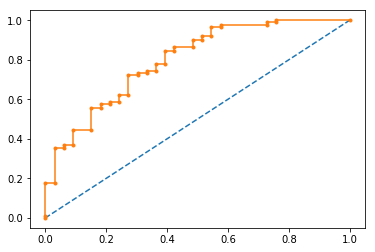

In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
X.head(5)


,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,total_ingreso,log_total_ingreso,log_Loan_Amount,Semiurban,Urban
0,0,0,0,0,0,360.0,1.0,11698,9.367173,4.986426,0,1
1,0,1,1,0,0,360.0,1.0,9166,9.123256,4.852030,0,0
2,0,1,0,0,1,360.0,1.0,6000,8.699515,4.189655,0,1
3,0,1,0,1,0,360.0,1.0,5166,8.549854,4.787492,0,1
4,0,0,0,0,0,360.0,1.0,12000,9.392662,4.948760,0,1


In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np



xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=10, seed=123)
xg_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)

In [ ]:
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.935600


In [ ]:
y_true = y_test
y_pred = preds
confusion_matrix(y_true, y_pred)

array([[27780,   177],
       [ 1755,   288]])